# Определение перспективного тарифа для телеком-компании
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла

У нас в наличии 5 таблиц с данными. Посмотрим за что отвечает каждая.

### Таблица <b>calls</b>:

In [1]:
import pandas as pd

calls = pd.read_csv('/datasets/calls.csv')
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [2]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица calls (информация об интернет-сессиях):
<ul>
    <li><i>id</i> - уникальный номер звонка
    <li><i>call_date</i> - дата звонка
    <li><i>duration</i> - длительность звонка в минутах
    <li><i>user_id</i> - идентификатор пользователя
</ul>

### Таблица <b>internet</b>

In [3]:
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>
    
`Unnamed: 0` возникает, когда данные сохраняют с указанием индекса `pd.DataFrame().to_csv(..., index=column)`. Если при чтении указать этот столбец `pd.read_csv(..., index_col=0)` - данные сразу прочитаются корректно.</div>

<div class="alert-info">
<b>Комментарий студента</b><p>Добавлено</p>

In [4]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Таблица internet (информация об интернет-сессиях):
<ul>
    <li><i>id</i> - уникальный номер сессии
    <li><i>mb_used</i> - объём потраченного за сессию интернет-трафика (в мегабайтах)
    <li><i>session_date</i> - дата интернет-сессии
    <li><i>user_id</i> - идентификатор пользователя
</ul>

### Таблица <b>messages</b>:

In [5]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [6]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица messages (информация о сообщениях):
<ul>
    <li><i>id</i> — уникальный номер сообщения
    <li><i>message_date</i> — дата сообщения
    <li><i>user_id</i> — идентификатор пользователя, отправившего сообщение
</ul>

### Таблица <b>tariffs</b>:

In [7]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица tariffs (информация о тарифах):
<ul>
    <li><i>tariff_name</i> — название тарифа
    <li><i>rub_monthly_fee</i> — ежемесячная абонентская плата в рублях
    <li><i>minutes_included</i> — количество минут разговора в месяц, включённых в абонентскую плату
    <li><i>messages_included</i> — количество сообщений в месяц, включённых в абонентскую плату
    <li><i>mb_per_month_included</i> — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    <li><i>rub_per_minute</i> — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    <li><i>rub_per_message</i> — стоимость отправки сообщения сверх тарифного пакета
    <li><i>rub_per_gb</i> — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
</ul>

### Таблица <b>users</b>:

In [9]:
users = pd.read_csv('/datasets/users.csv')
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица users (информация о пользователях):
<ul>
    <li><i>user_id — уникальный идентификатор пользователя
    <li><i>first_name — имя пользователя
    <li><i>last_name — фамилия пользователя
    <li><i>age — возраст пользователя (годы)
    <li><i>reg_date — дата подключения тарифа (день, месяц, год)
    <li><i>churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    <li><i>city — город проживания пользователя
    <li><i>tariff — название тарифного плана


<b>Вывод</b><br>
В данных отсутствуют пропуски, тип столбцов с датой нужно изменить на соответствующий. В остальном, данные чистые.

## Подготовка данных

### Предобработка данных

Сразу проверим данные на наличие дубликатов:

In [11]:
print(f'Дубликатов в таблице users - {users.duplicated().sum()}')
print(f'Дубликатов в таблице calls - {calls.duplicated().sum()}')
print(f'Дубликатов в таблице messages - {messages.duplicated().sum()}')
print(f'Дубликатов в таблице internet - {internet.duplicated().sum()}')

Дубликатов в таблице users - 0
Дубликатов в таблице calls - 0
Дубликатов в таблице messages - 0
Дубликатов в таблице internet - 0


Изменим тип столбцов с датой на дату:

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

### Сводные таблицы

#### Отдельные таблицы

Сперва добавим в некоторые таблицы по столбцу с индексом месяца к каждой записи. Они пригодятся в будущем.

In [13]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

Посчитаем количество сделанных звонков и израсходованных минут каждым пользователем по месяцам. Создадим сводную таблицу.

In [14]:
calls_pivot = (calls[['user_id','duration', 'month']].pivot_table(index=['user_id', 'month'],
                                                                  values='duration', 
                                                                  aggfunc=['sum', 'count']))
calls_pivot.columns = ['minutes', 'calls_quantity']
calls_pivot

minutes  calls_quantity
user_id month                         
1000    5       150.06              22
        6       158.90              43
        7       318.80              47
        8       389.87              52
        9       440.14              58
...                ...             ...
1498    10      232.63              41
1499    9        64.65               9
        10      429.91              68
        11      576.50              74
        12      465.16              69

[3174 rows x 2 columns]

Посчитаем количество отправленных сообщений по месяцам.

In [15]:
messages_pivot = (messages[['user_id','month', 'message_date']].pivot_table(index=['user_id', 'month'],
                                                                            values='message_date',
                                                                            aggfunc='count'))
messages_pivot = messages_pivot.fillna(0)
messages_pivot.columns=['messages']
messages_pivot

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

Посчитаем объем израсходанного интернет-траффика по месяцам.

In [16]:
internet_pivot = (internet[['user_id','mb_used', 'month']].pivot_table(index=['user_id','month'],
                                                                       values='mb_used', 
                                                                       aggfunc=['sum', 'count']))
internet_pivot = internet_pivot.fillna(0)
internet_pivot.columns=['gb_used','sessions']
internet_pivot['gb_used'] /= 1024
internet_pivot

gb_used  sessions
user_id month                     
1000    5       2.200674         5
        6      22.689229        49
        7      13.675430        29
        8      13.726494        29
        9      14.227451        27
...                  ...       ...
1498    10     20.097031        59
1499    9       1.802490         5
        10     17.371592        58
        11     17.542295        49
        12     12.749590        45

[3203 rows x 2 columns]

#### Общая таблица с расчетами

Объеденение таблиц:

In [17]:
final_data = (calls_pivot.merge(messages_pivot, on=['user_id', 'month'], how='outer').
             merge(internet_pivot, on=['user_id', 'month'], how='outer').reset_index().
             merge(users[['user_id', 'first_name', 'last_name', 'city']], on='user_id', how='outer'))

final_data = final_data.merge(users.loc[:,['user_id', 'tariff']], on='user_id', how='left') 
final_data = final_data.rename(columns={'tariff': 'tariff_name'})
final_data = final_data.merge(tariffs, on='tariff_name')

import math

final_data = final_data.fillna(0)
final_data['minutes'] = final_data['minutes'].apply(math.ceil)
final_data['gb_used'] = final_data['gb_used'].apply(math.ceil)

final_data

,user_id,month,minutes,calls_quantity,messages,gb_used,sessions,first_name,last_name,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,151,22.0,22.0,3,5.0,Рафаил,Верещагин,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,159,43.0,60.0,23,49.0,Рафаил,Верещагин,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,319,47.0,75.0,14,29.0,Рафаил,Верещагин,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,390,52.0,81.0,14,29.0,Рафаил,Верещагин,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,441,58.0,57.0,15,27.0,Рафаил,Верещагин,Краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,0,0.0,32.0,17,63.0,Павел,Гончаров,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3212,1489,10.0,0,0.0,21.0,20,63.0,Павел,Гончаров,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3213,1489,11.0,0,0.0,20.0,18,55.0,Павел,Гончаров,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3214,1489,12.0,0,0.0,35.0,17,51.0,Павел,Гончаров,Санкт-Петербург,smart,50,15360,500,550,200,3,3


Посчитаем помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [18]:
proceeds = [] 
#цикл который читает каждую строку таблицы final_data вычисляет количество минут, сообщений, гигабайт, что пользователь
#использовал сверх тарифного плана (общее - план). Параллельно с этим функция лямбда приравнивает к нулю отрицательные значения 
#                                                  (когда пользователь не заходил за тарифный план)
#проводятся расчеты общей выручки в переменной user_proceeds и потом она добавляется в лист proceeds[]
#который мы добавим в таблицу
for index in range(len(final_data)):
    l = lambda x: 0 if x < 0 else x
    extra_minutes = l(final_data.loc[index, 'minutes'] - final_data.loc[index, 'minutes_included'])
    extra_messages = l(final_data.loc[index, 'messages'] - final_data.loc[index, 'messages_included'])
    extra_gb = l(final_data.loc[index, 'gb_used'] - final_data.loc[index, 'mb_per_month_included'] / 1024)
    
    user_proceeds = (extra_minutes * final_data.loc[index, 'rub_per_minute']
                    + extra_messages * final_data.loc[index, 'rub_per_message']
                    + extra_gb * final_data.loc[index, 'rub_per_gb']
                    + final_data.loc[index, 'rub_monthly_fee'])
    proceeds.append(user_proceeds)

final_data['proceeds'] = proceeds


In [19]:
final_data.head()

,user_id,month,minutes,calls_quantity,messages,gb_used,sessions,first_name,last_name,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,proceeds
0,1000,5.0,151,22.0,22.0,3,5.0,Рафаил,Верещагин,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6.0,159,43.0,60.0,23,49.0,Рафаил,Верещагин,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7.0,319,47.0,75.0,14,29.0,Рафаил,Верещагин,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8.0,390,52.0,81.0,14,29.0,Рафаил,Верещагин,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9.0,441,58.0,57.0,15,27.0,Рафаил,Верещагин,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0


## Исследовательский анализ

Исследуем график. Посмотрим какое количество минут, сообщений и гигабайт в среднем нужно людям. Сперва посмотрим на гистограммы:

### Использование пакета минут

ULTRA
Тарифный план - 3000
Среднее - 497.0425963488844
Дисперсия - 90117.46011264299
Стандартное отклонение - 300.1957030216172

SMART
Тарифный план - 500
Среднее - 394.74529147982065
Дисперсия - 32448.31194506978
Стандартное отклонение - 180.13414985801492


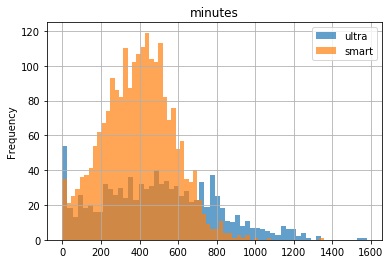

In [20]:
import matplotlib as plt
import numpy as np

final_data.query('tariff_name == "ultra"')['minutes'].plot( kind='hist', bins=60, title='minutes', grid=True, label='ultra', legend=True, alpha=.7)
print('ULTRA')
print('Тарифный план -', tariffs.loc[1, 'minutes_included'])
print('Среднее -', final_data.query('tariff_name == "ultra"')['minutes'].mean())
#ddof = 1 так как мы рассматриваем выборки
print('Дисперсия -',np.var(final_data.query('tariff_name == "ultra"')['minutes'], ddof=1))
print('Стандартное отклонение -', np.std(final_data.query('tariff_name == "ultra"')['minutes'], ddof=1))
print()

final_data.query('tariff_name == "smart"')['minutes'].plot( kind='hist', bins=60, title='minutes', grid=True, label='smart', legend=True, alpha=.7)
print('SMART')
print('Тарифный план -', tariffs.loc[0, 'minutes_included'])
print('Среднее -', final_data.query('tariff_name == "smart"')['minutes'].mean())
print('Дисперсия -', np.var(final_data.query('tariff_name == "smart"')['minutes'], ddof=1))
print('Стандартное отклонение -', np.std(final_data.query('tariff_name == "smart"')['minutes'], ddof=1))

<p><b>Ultra</b>. В среднем люди требуют 515 минут в месяц. Более 1200 минут людям нужно очень редко. Много значений у нуля означает лишь то что некоторая часть людей не говорит по телефону, никаких аномалий.</p>
<p><b>Smart</b>. В среднем люди требуют 395 минут в месяц. Более 800 минут людям нужно очень редко. Никаких аномалий. Половина пользователей оплачивает сверх тарифный план.</p>

### Использование сообщений

Тарифный план - 1000
Среднее (без нуля) - 61.161006289308176
Среднее - 49.31338742393509
Дисперсия - 2285.4174246558414
Стандартное отклонение - 47.80603962530092

SMART
Тарифный план - 50
Среднее (без нуля) - 38.71644120707596
Среднее - 33.36905829596412
Дисперсия - 796.9552557301129
Стандартное отклонение - 28.230395954185852


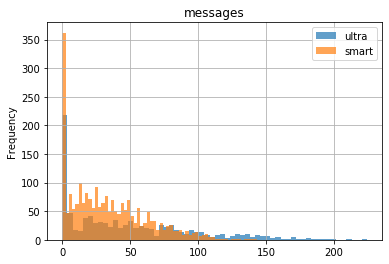

In [21]:
final_data.query('tariff_name == "ultra"')['messages'].plot( kind='hist', bins=60, title='messages', grid=True, label='ultra', legend=True, alpha=.7)

print('Тарифный план -', tariffs.loc[1, 'messages_included'])
print('Среднее (без нуля) -', final_data.query('messages > 0 and tariff_name == "ultra"')['messages'].mean())
print('Среднее -', final_data.query('tariff_name == "ultra"')['messages'].mean())
print('Дисперсия -', np.var(final_data.query('tariff_name == "ultra"')['messages'], ddof=1))
print('Стандартное отклонение -', np.std(final_data.query('tariff_name == "ultra"')['messages'], ddof=1))
print()

final_data.query('tariff_name == "smart"')['messages'].plot( kind='hist', bins=60, title='messages', grid=True, label='smart', legend=True, alpha=.7)
print('SMART')       
print('Тарифный план -', tariffs.loc[0, 'messages_included'])
print('Среднее (без нуля) -', final_data.query('messages > 0 and tariff_name == "smart"')['messages'].mean())
print('Среднее -', final_data.query('tariff_name == "smart"')['messages'].mean())
print('Дисперсия -', np.var(final_data.query('tariff_name == "smart"')['messages'], ddof=1))
print('Стандартное отклонение -', np.std(final_data.query('tariff_name == "smart"')['messages'], ddof=1))

<p>Создали два средних. То что с приставкой 'x' предназначена для того чтобы оценить только тех людей, что используют смс.</p>
<p><b>Smart</b>. Людям, использующим смс, нужно в среднем 38 сообщений в месяц. Чаще всего люди не используют смс-сообщения. Неудивительно, ведь любой тариф дает доступ к онлайн мессенджерам.<br> Большая часть пользователей оплачивает сверх тарифный план.</p>
<p><b>Ultra</b>. Людям, использующим смс, нужно в среднем 49 сообщений в месяц. Чаще всего люди не используют смс-сообщения.</p>

### Использование интернета

ULTRA
Тарифный план - 30.0
Среднее - 19.474645030425965
Дисперсия - 97.37854429011234
Стандартное отклонение - 9.868056763624352

SMART
Тарифный план - 15.0
Среднее - 16.32152466367713
Дисперсия - 33.133453035506285
Стандартное отклонение - 5.7561665225657155


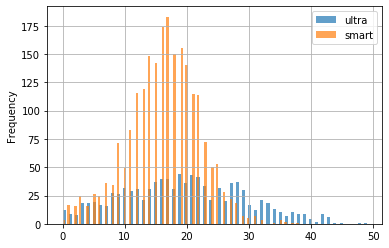

In [22]:
import seaborn as sns
final_data.query('tariff_name == "ultra"')['gb_used'].plot(kind='hist', bins=100, grid=True, label='ultra', legend=True, alpha=0.7)
print('ULTRA')    
print('Тарифный план -', tariffs.loc[1, 'mb_per_month_included'] / 1024)
print('Среднее -', final_data.query('tariff_name == "ultra"')['gb_used'].mean())
print('Дисперсия -', np.var(final_data.query('tariff_name == "ultra"')['gb_used'], ddof=1))
print('Стандартное отклонение -', np.std(final_data.query('tariff_name == "ultra"')['gb_used'], ddof=1))
print()

final_data.query('tariff_name == "smart"')['gb_used'].plot(kind='hist', bins=100, grid=True, label='smart', legend=True, alpha=0.7)
print('SMART')
print('Тарифный план -', tariffs.loc[0, 'mb_per_month_included'] / 1024)
print('Среднее -', final_data.query('tariff_name == "smart"')['gb_used'].mean())
print('Дисперсия -', np.var(final_data.query('tariff_name == "smart"')['gb_used'], ddof=1))
print('Стандартное отклонение -', np.std(final_data.query('tariff_name == "smart"')['gb_used'], ddof=1))

<b>Smart</b>. В среднем люди используют 16 гигабайт в месяц. Чаще всего людям требуется 20 гигабайт.<br>
<b>Ultra</b>. В среднем люди используют 19 гигабайт в месяц. Никаких аномалий в распределении нет

<b>Вывод</b><br>
Тариф <b>ultra</b> стоит дороже, но большая часть его пакета не используется. Об этом нам говорят гистограммы использования звонков и смс-сообщений.<br>
Тариф <b>smart</b> стоит дешевле, но в половине случаев пользователям не хватает его пакета услуг и переходят на сверх тарифный план, который оплачивается отдельно.<br>
В следующем разделе сравним средние чеки.

## Проверка гипотез о тарифах

### Средняя выручка пользователей двух тарифов различаются

Используем статистический т-тест на двух выборках. Проверим дисперсии что узнать каким ставить параметр <i>equal_var</i>:

In [23]:
print('Дисперсия выручки тарифа ULTRA -', np.var(final_data.query('tariff_name == "ultra"')['proceeds'], ddof=1))
print('Размер выборки -', final_data.query('tariff_name == "ultra"')['proceeds'].count())

print('Дисперсия выручки тарифа SMART -', np.var(final_data.query('tariff_name == "smart"')['proceeds'], ddof=1))
print('Размер выборки -', final_data.query('tariff_name == "smart"')['proceeds'].count())

Дисперсия выручки тарифа ULTRA - 141387.7148093615
Размер выборки - 986
Дисперсия выручки тарифа SMART - 641402.5360534898
Размер выборки - 2230


Различия в 4 раза. <i>equal_var = False</i><br>
Обозначим статистическую значимость в 0.05<br><br>
Нулевая гипотеза - средняя выручка первого тарифа <b>равна</b> средней выручке второго<br>
Альтернативная гипотеза - средняя выручка первого <b>не равна</b> средней выручке второго

In [24]:
import scipy.stats as stats

sample_1 = final_data.query('tariff_name == "ultra"')['proceeds']
sample_2 = final_data.query('tariff_name == "smart"')['proceeds']

alpha = .05

results = stats.ttest_ind(sample_1, sample_2, equal_var=False)
print('р-значение -', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средний чек тарифа ULTRA -', final_data.query('tariff_name == "ultra"')['proceeds'].mean())
print('Средний чек тарифа SMART -', final_data.query('tariff_name == "smart"')['proceeds'].mean())

р-значение - 2.6421117114478516e-274
Отвергаем нулевую гипотезу
Средний чек тарифа ULTRA - 2070.030425963489
Средний чек тарифа SMART - 1257.2713004484306


Нулевая гипотеза не подтвердилась в данном тесте. По результатам теста - средняя выручка двух тарифов в месяц вероятнее всего различаются.

<div class="alert-info">
<b>Комментарий студента</b>
<p>Исправлено - немного изменил формулировку вывода</p>

Мы определили что средний чек тарифа ULTRA в месяц скорее всего не будет равен среднему чеку тарифа SMART. Причем средний чек первого будет больше. Теперь, чтобы определить прибыль с каждого тарифа нужно умножить средний чек на количество записей в final_data где tariff_name = (соответствующий тариф)

In [25]:
print('Прибыль тарифа ULTRA за весь год -',
     final_data.query('tariff_name == "ultra"')['proceeds'].mean() * 
     final_data.query('tariff_name == "ultra"')['proceeds'].count())
print('Прибыль тарифа SMART за весь год -',
     final_data.query('tariff_name == "smart"')['proceeds'].mean() * 
     final_data.query('tariff_name == "smart"')['proceeds'].count())

Прибыль тарифа ULTRA за весь год - 2041050.0000000002
Прибыль тарифа SMART за весь год - 2803715.0


Тариф smart выгоднее для оператора, так как приносит бОльшую прибыль.

### Средняя выручка пользователей из Москвы отличается от остальных

Аналогично прошлому пунку, используем т-тест на двух выборках. Сравним дисперсии:

In [26]:
print('Дисперсия выручки пользователей из Москвы -', np.var(final_data.query('city == "Москва"')['proceeds'], ddof=1))
print('Размер ген. совокупности -', final_data.query('city == "Москва"')['proceeds'].count())

print()

print('Дисперсия выручки пользователей из других регионов -', np.var(final_data.query('city != "Москва"')['proceeds'], ddof=1))
print('Размер ген. совокупности -', final_data.query('city != "Москва"')['proceeds'].count())



Дисперсия выручки пользователей из Москвы - 562832.1982935794
Размер ген. совокупности - 611

Дисперсия выручки пользователей из других регионов - 643989.6721190786
Размер ген. совокупности - 2605


<i>equal_var = False</i><br>
Статистическая значимость - 0.05

Нулевая гипотеза - средняя выручка пользователей из Москвы равна средней выручке остальных регионов.<br>
Альтернативная гипотеза - средняя выручка не равна второй

In [27]:
sample_1 = final_data.query('city == "Москва"')['proceeds']
sample_2 = final_data.query('city != "Москва"')['proceeds']

alpha = .05

results = stats.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение -', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средний чек пользователей из Москвы -', final_data.query('city == "Москва"')['proceeds'].mean())
print('Средний чек пользователей не из Москвы -', final_data.query('city != "Москва"')['proceeds'].mean())

p-значение - 0.46183914667656145
Не получилось отвергнуть нулевую гипотезу
Средний чек пользователей из Москвы - 1526.8379705400982
Средний чек пользователей не из Москвы - 1501.6763915547026


P-значение означает что вероятность случайно подтвердить нулевую гипотезу равна 38%.<br>
Не удалось отвергнуть нулевую гипотезу. По всей видимости чеки не различаются. 

<b>Вывод</b><br>
<p>Первая гипотеза о различии средних чеков подтвердилась. Средний чек тарифа <b>smart</b> никогда не будет равен среднему чеку тарифа <b>ultra</b>, об этом говорит р-значение которое имеет 277 нулей после запятой. При этом, средний чек первого в 1.5 раза меньше среднего чека второго тарифа<p>
Вторая гипотеза о разности средних чеков пользователей из Москвы и других не подтвердилась. Средние говорят о том что они равны, но вероятность получить такой результат 38%

## Общий вывод

В ходе проекта мы изучили данные 5-ти таблиц. Провели предобработку данных, изменив типы данных. Построили сводные таблицы и объеденили их в одну общую.<br>
Мы исследовали оба тарифа и выяснили следующее:
<ul>
    <li>Тариф <b>ultra</b> предоставляет большой пакет, который никто не использует в полной мере. Люди переплачивают лишь за интернет.
    <li>Тариф <b>smart</b> в 4 раза дешевле и предоставляет скромный пакет, которого не хватает половине пользователей.
</ul>
Проверив гипотезы мы выяснили:
<ul>
    <li>Средний чек пользователя из Москвы и других регионов скорее всего не будет отличаться.
    <li>Несмотря на то что в тарифе <b>smart</b> половина пользователей оплачивает сверх тарифный план, средний чек с каждого пользователя почти всегда будет меньше чем средний чек с пользователя тарифа <b>ultra</b>. Но по итогу тариф <b>smart</b> выгоднее бизнесу, потому что его выбирает большее количество людей.